## Introduction to Language Models

Language Modelling is an important idea behind many Natural Language Processing tasks such as Machine Translation, Spelling Correction, Speech Recognition, Summerization, Question-Answering etc. Some recent applications of Language models involve Smart Reply in Gmail & Google Text suggestion in SMS. This introduction is mostly inspired by Chapter 4 'Language Modeling with N-grams' of book: "Speech and Language Processing" by Daniel Jurafsky & James H. Marti <sup>[[1]](https://web.stanford.edu/~jurafsky/slp3/)</sup>

### What is a Language Model?

Basically Language Model assigns a probability to a sentence or a sequence of words. so given a sequence of words $w_1,w_2,w_3,w_4,w_5,...,w_n$

Probability $P(W)$ of this sequence of words will be:

#### <center>$P(W) = P(w_1,w_2,w_3,w_4,w_5,...,w_n)$</center>

We can also calculate conditional probability of last word given previous words as:

#### <center>$P(w_n) = P(w_n\, | \,w_1,w_2,w_3,w_4,w_5,...,w_n-1)$</center>


Lets take an example of sentence "weather is pleasant". Probability of this sentence will be expressed as:

#### <center>$P("weather\, is\, pleasent") = P(weather)\, \times \,P(is\, | \,weather)\, \times \,P(pleasent\, | \,weather\, is)$</center>

Formally this can be expresed as:

#### <center>$P(w_1,w_2,w_3,w_4,w_5,...,w_n) = \prod_{i=1}^n\, P(w_i\, | \,w_1,w_2,w_3,w_4,w_5,...,w_i-1)$</center>

But how do we calculate this probability?


### Markov Assumption

Andrey Markov was a Russian mathematician who described a stochastic process with a property called Markov Property or Markov Assumption. This basically states that one can make predictions for the future of the process based solely on its present state just as well as one could knowing the process's full history, hence independently from such history.<sup>[[2]](https://en.wikipedia.org/wiki/Markov_property)</sup>

Based on this assumption we can rewrite probability of 'pleasent' as:

#### <center>$P(pleasent\, | \,weather\, is) \approx P(pleasent\, | \,weather)$</center>

Or formally as:

#### <center>$P(w_n\, | \,w_1,w_2,w_3,w_4,w_5,...,w_n-1) = P(w_n\, | \,w_n-1)$</center>

Above equation also represent a Bigram<sup>[[3]](https://en.wikipedia.org/wiki/Bigram)</sup> model. In case of N-gram models this assumption can be extended such that conditional probability may depend on couple of previous words as:

#### <center>$P(w_n\, | \,w_1,w_2,w_3,w_4,w_5,...,w_n-1) = P(w_n\, | \,w_n-k,...,w_n-1)$</center>


### Bigram Model

Now lets find probability for simplest model where conditional probability of any word only depends on previous word by Markov assumption.

#### <center>$P(w_i\,|\,w_i-1) = \frac{count(w_i-1,w_i)}{count(w_i-1)}$</center>

Lets understand this with a small corpus of famous poem 'A Girl' by Ezra Pound<br><br>

<center>
_The tree has entered **my hands**,<br>
The sap has ascended **my arms**,<br>
The tree has grown in **my breast-Downward**,<br>
The branches grow out of me, like arms.<br>

Tree you are,<br>
Moss you are,<br>
You are violets with wind above them.<br>
A child - so high - you are,<br>
And all this is folly to the world._<br>
</center>

Here Probability of 'arms' given 'my' is:
#### <center>$P(arms\, |\, my) = \frac{1}{3}$</center>

To calculate probability of first & last word `<s>` & `<\s>` are added at start & end of sentence respectively. Similarly probability of sentence or sequence of words can be calculated using above approach.

### Applications of Language Models

**1. Spelling Correction**

For spelling correction probability of incorrect sentence will be much smaller then correct sentence

#### <center>$P(weather\, is\, \mathbf{pleasent}) > P(weather\, is\, \mathbf{plesen})$</center>

**2. Speech Recognition**

As words 'weather' & 'whether' may have similar phonetics, system may confuse among these but probability of 'weather is pleasent' will be higher than 'whether is pleasent'

#### <center>$P(\mathbf{weather}\, is\, pleasent) > P(\mathbf{whether}\, is\, pleasent)$</center>

**3. Machine Translation**

Selecting appropriate sequence while translating from one language to another can also use probability of sequence for providing more appropriate translations 

#### <center>$P(\mathbf{high}\, winds\, tonight) > P(\mathbf{large}\, winds\, tonight)$</center>

**4. Gmail Smart Reply**

Complete details of this system are discussed in this paper: "Smart Reply: Automated Response Suggestion for Email"   <sup>[[4]](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/45189.pdf)</sup>

<center><img src="smart_reply.png">
[Image Source](https://blog.google/products/gmail/save-time-with-smart-reply-in-gmail/)</center>

**5. Predictive Text**

By looking at previous sequence of words language model can predict next word, this feature was recently introduced in android phone keyboard by Google. 
<br><br>

<center><img src="predictive_text.png" style="width:460px;height:190px;"></center>

Now lets build our own language model for predicting next word using a very small corpus of words. I will build this model using keras & deep neural network architecture with LSTM. 


### Building Language Model

As Language modeling involves predicting the next word in a sequence given the sequence of words already present we can train a language model to create subsequent words in sequence from given starting sequence.

Sequence Models or Recurrent neural networks, or RNNs<sup>[[5]](http://www.dtic.mil/get-tr-doc/pdf?AD=ADA164453)</sup> are a family of neural networks for processing sequential data. A detailed discussion on Sequence Models is provided in Chapter 10 of Deep Learning Book. <sup>[[6]](http://www.deeplearningbook.org/contents/rnn.html)</sup>

Language model design discussed below is inspired by this insightful article: [How to Develop Word-Based Neural Language Models in Python with Keras](https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/) by Jason Brownlee.

For this language model I will use part of the poem "This Is the House That Jack Built" <sup>[[7]](https://en.wikipedia.org/wiki/This_Is_the_House_That_Jack_Built)</sup> as training corpus.

**_This Is the House That Jack Build_**

In [1]:
data = """ This is the house that Jack built.\n
This is the malt that lay in the house that Jack built.\n
This is the rat that ate the malt\n
That lay in the house that Jack built.\n
This is the cat that killed the rat\n
That ate the malt that lay in the house that Jack built.\n
This is the dog that worried the cat\n
That killed the rat that ate the malt\n
That lay in the house that Jack built.\n
This is the cow with the crumpled horn\n """

_Importing Packages_

In [2]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.utils.vis_utils import plot_model
from keras_tqdm import TQDMNotebookCallback
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

/home/mohit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_Procedure to generate sequence_

In [3]:
def generate_seq(model, tokenizer, seed_text, n_words):
	in_text, result = seed_text, seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		encoded = array(encoded)
		# predict a word in the vocabulary
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text, result = out_word, result + ' ' + out_word
	return result

_Integer encoding of text_

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

tokens = data.split(" ")
print("Word to Interger mapping of first 6 words:\n")
for i in range(6):
    print(tokens[i+1],encoded[i])

Word to Interger mapping of first 6 words:

This 3
is 4
the 1
house 5
that 2
Jack 6


_Determining the vocabulary size_

In [5]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 21


_Creating sequences of words to fit the model with one word as input and one word as output_

In [6]:
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
print('Forst 10 Sequences: ',sequences[:10])

Total Sequences: 86
Forst 10 Sequences:  [[3, 4], [4, 1], [1, 5], [5, 2], [2, 6], [6, 7], [7, 3], [3, 4], [4, 1], [1, 8]]


In [7]:
sequences = array(sequences)
X, y = sequences[:,0],sequences[:,1]
print("Firt 5 Sequence Outputs")
print(y[:5])

y = to_categorical(y, num_classes=vocab_size)
print("\nTheir One Hot encodings:")
print(y[:5])

Firt 5 Sequence Outputs
[4 1 5 2 6]

Their One Hot encodings:
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


_Building Model_

In [8]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


_Model Architecture_

In [9]:
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 10)             210       
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_1 (Dense)              (None, 21)                1071      
Total params: 13,481
Trainable params: 13,481
Non-trainable params: 0
_________________________________________________________________
None


<center><img src="model_plot.png"></center>

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
history = model.fit(X, y, epochs=500, verbose=0, callbacks=[TQDMNotebookCallback()])

_Finally lets generate sequence of 6 words by providing only first letter for sequence_

In [12]:
print(generate_seq(model, tokenizer, 'This', 6))

This is the house that jack built


As expected the model generated the most plausible line based on training corpus.

_Accuracy & Loss Plots_

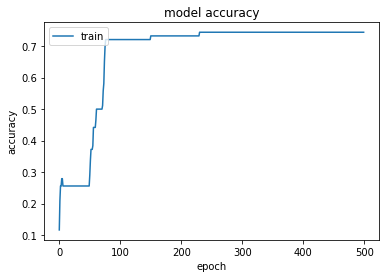

In [13]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

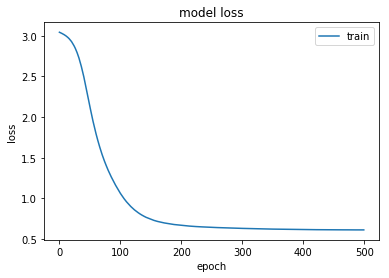

In [14]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Refrences

1. Jurafsky, Dan. Speech & language processing. Pearson Education India, 2000.
2. https://en.wikipedia.org/wiki/Markov_property
3. https://en.wikipedia.org/wiki/Bigram
4. Kannan, Anjuli, et al. "Smart reply: Automated response suggestion for email." Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. ACM, 2016.
5. Rumelhart, David E., Geoffrey E. Hinton, and Ronald J. Williams. Learning internal representations by error propagation. No. ICS-8506. California Univ San Diego La Jolla Inst for Cognitive Science, 1985.
6. https://en.wikipedia.org/wiki/This_Is_the_House_That_Jack_Built
7. http://www.deeplearningbook.org/contents/rnn.html
8. https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/


_Thanks for reading this notebook. I am also learning NLP & not an expert in this field. Feel free to provide your feedback on errors & improvements._